In [58]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
# Load data
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# check for full values
df.isnull().sum()

In [4]:
df = df.set_index('City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
# display all the cities in the dataset
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='City')

In [6]:
# get statistical info
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


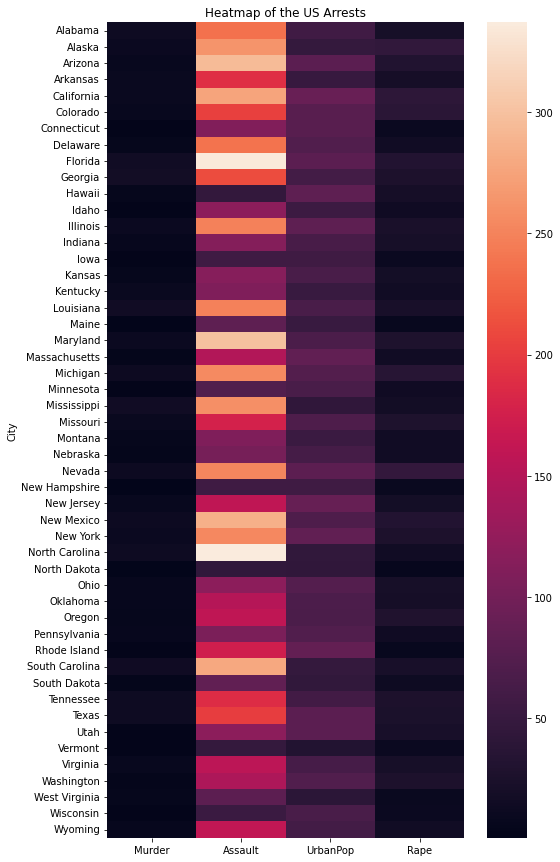

In [7]:
# plot heatmap of the dataset
plt.figure(figsize=(8, 15))
sns.heatmap(df)
plt.title("Heatmap of the US Arrests")
plt.show()

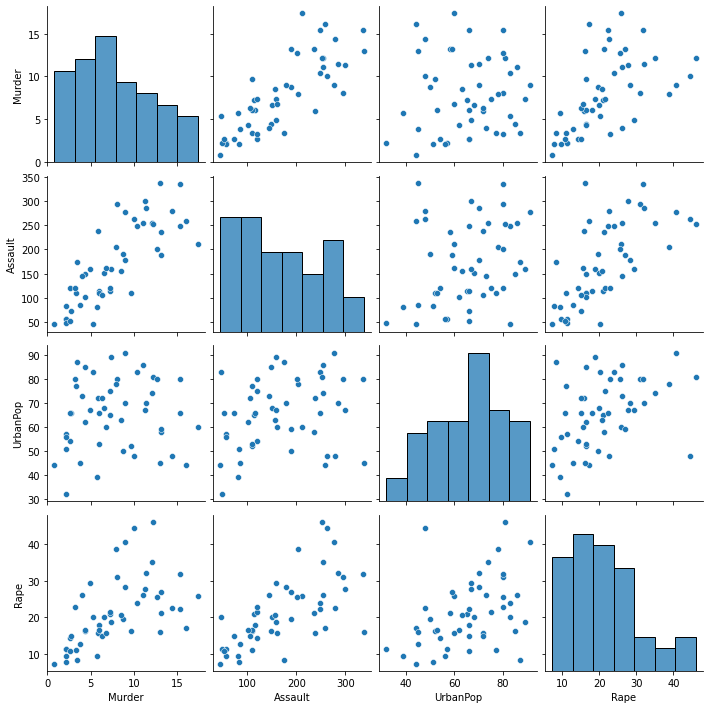

In [8]:
sns.pairplot(df)
plt.show()

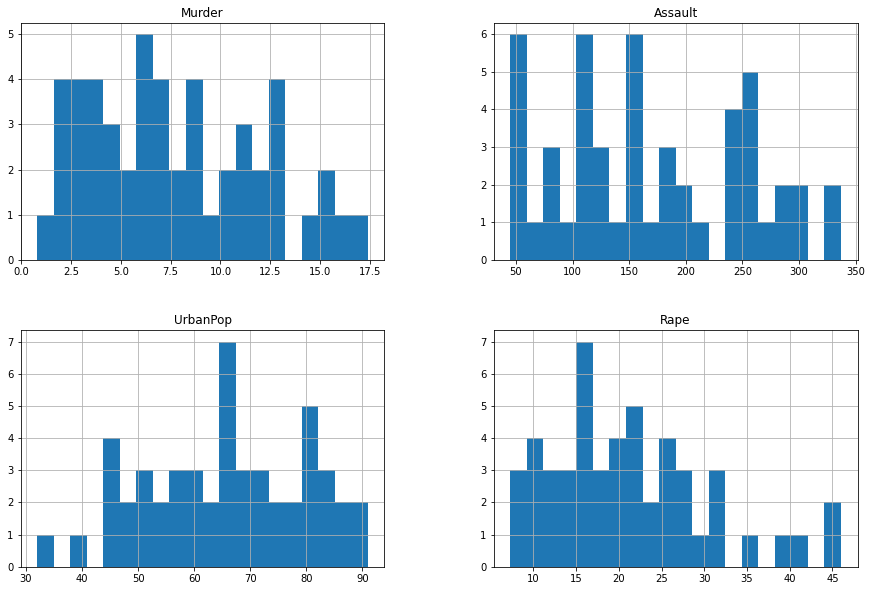

In [9]:
#  histograms for dataset variables
df.hist(bins=20, figsize=(15, 10))
plt.show()

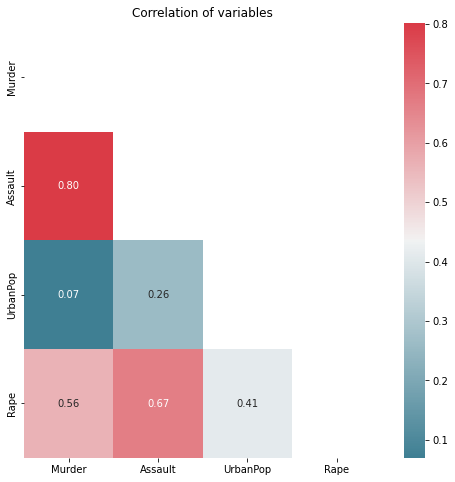

In [10]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(8, 8))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap = colormap, annot = True, fmt = ".2f", mask = dropSelf)
  
  plt.title("Correlation of variables")
    
  plt.show()

corr_heatmap(df)

In [11]:
# drop rows with missing values
df = df.dropna()

# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])

pca_df.head()

,PC 1,PC 2,PC 3,PC 4
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


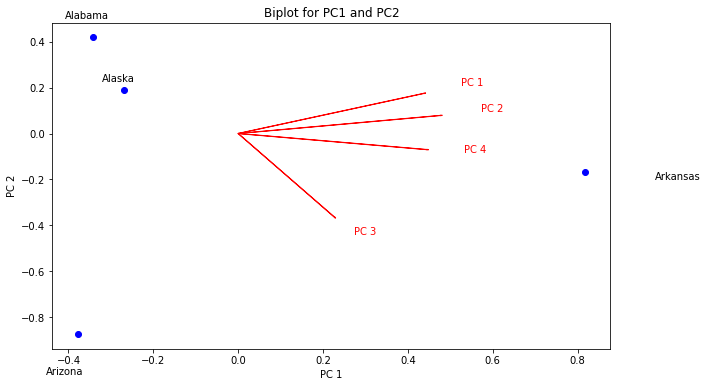

In [89]:
# extract the first two PC loadings
xvector = pca.components_[0]
yvector = pca.components_[1]

plt.figure(figsize=(10, 6))

# generate the Biplot for PCs
for i in range(len(xvector)):
    
# arrows as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), 
              yvector[i]*max(ys),
              color='red')
    
    plt.text(xvector[i]*max(xs)*1.2, 
             yvector[i]*max(ys)*1.2,
             list(pca_df.columns.values)[i], 
             color = 'red')
    
    
for i in range(len(xs)):
# circles as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(pca_df.index)[i], color='black')
    
plt.title('Biplot for PC1 and PC2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()  

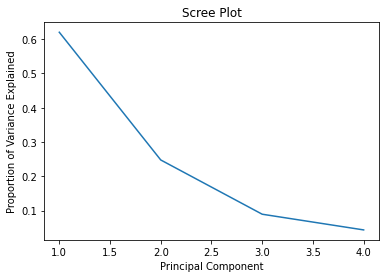

In [28]:
# plot Scree plot and Cumulative Variance Explained plot

# determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# this will be used to create Scree Plot 
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, exp_var_pca)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.show()


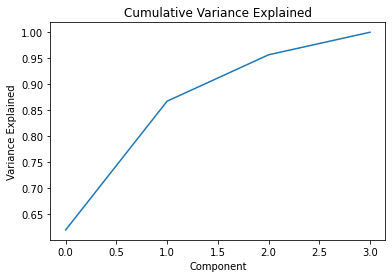

In [29]:
# this will be used to visualize the plot
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# this will be used to Cumulative Variance Explained plot
plt.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues)
plt.title("Cumulative Variance Explained")
plt.xlabel("Component")
plt.ylabel("Variance Explained")

plt.show()

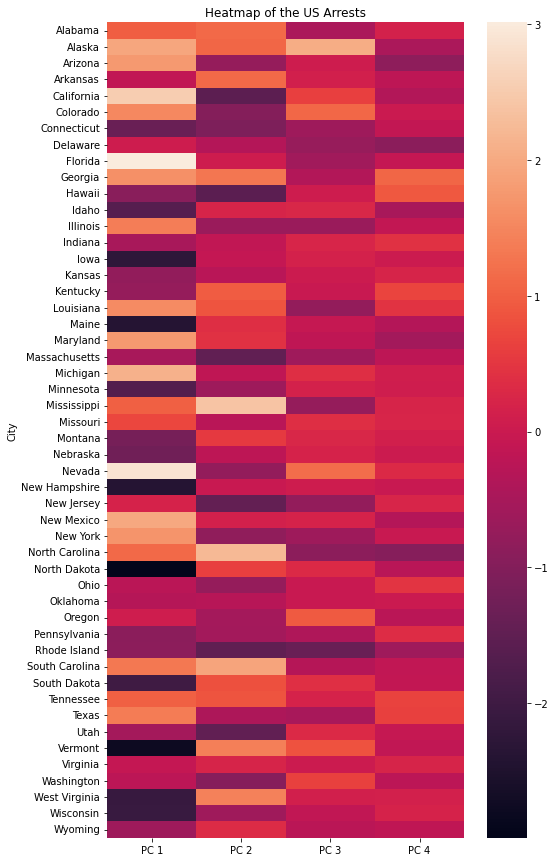

In [30]:
# heatmap of new pca dataset
plt.figure(figsize=(8, 15))
sns.heatmap(pca_df)
plt.title("Heatmap of the US Arrests")
plt.show()

In [32]:
#  Select two features from the data to use in this exercise and scale the data
X = df[['Murder', 'Assault']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(50, 2)


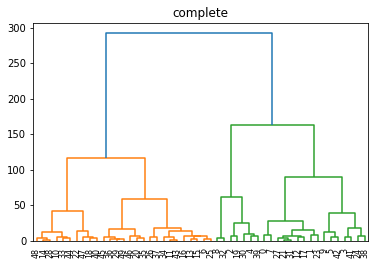

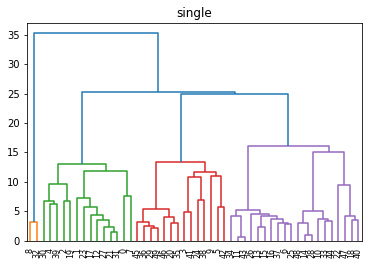

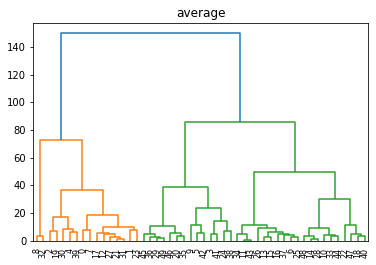

In [59]:
# plot dendrogram
dend1 = dendrogram(linkage(X, method='complete')) 
plt.title('complete')
plt.show()

# plot dendrogram
dend2 = dendrogram(linkage(X, method='single'))  
plt.title('single')
plt.show()

# plot dendrogram
dend3 = dendrogram(linkage(X, method='average'))  
plt.title('average')
plt.show()

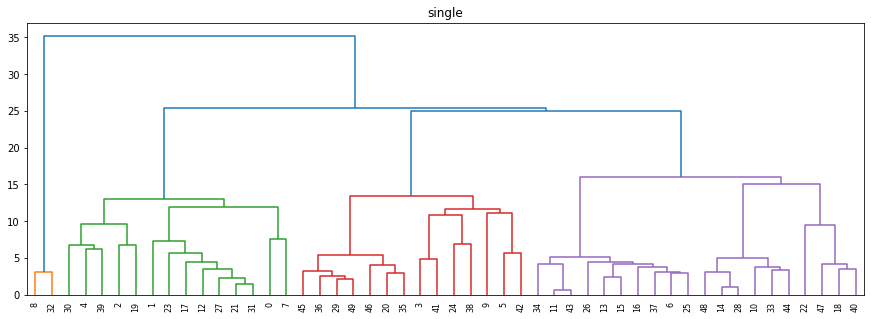

In [60]:
# From the dendrograms above, the complete linkage method creates the most
# balanced dispersion of clusters and will therefore be the method of choice for the
# rest of this analysis

# plot dendrogram
plt.figure(figsize=(15, 5))
dend2 = dendrogram(linkage(X, method='single'))  
plt.title('single')
plt.show()

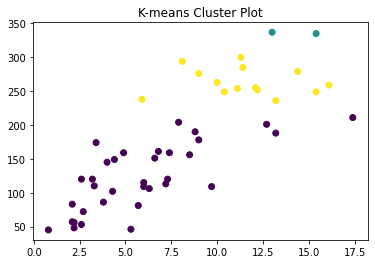

In [91]:
# type of linkage
L = "single"
# number of clusters
K = 3

# calculate the Kmean
KMean= KMeans(n_clusters=K)
KMean.fit(X)
label=KMean.predict(X)

cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
plt.title('K-means Cluster Plot')
plt.show()

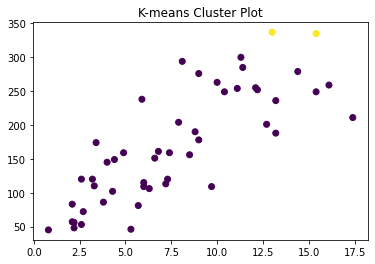

In [92]:
# type of linkage
L = "single"
# number of clusters
K = 2

# calculate the Kmean
KMean= KMeans(n_clusters=K)
KMean.fit(X)
label=KMean.predict(X)

cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
plt.title('K-means Cluster Plot')
plt.show()